In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def histogram(df):
    skip = {'sn_name', 'sn_type', 'band'}
    cols = [c for c in df.columns if c not in skip]

    n = len(cols)
    rows = (n + 2) // 2    # number of rows needed
    fig, axes = plt.subplots(rows, 2, figsize=(12, 3*rows))

    axes = axes.flatten()  # flatten so we can index axis[i]

    for i, column in enumerate(cols):
        ax = axes[i]
        df[column].hist(ax=ax, bins=30)
        #ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel("Count")

    # Hide unused axes if columns not multiple of 3
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

Type Ia supernovae

In [ ]:
Ia = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML_Fall2025_Supernovae/ML_master_table_TypeIa.csv')
#Ia.head(5)
Ia.describe()

,A,phi,sigma,k
count,1.259000e+04,12590.000000,12590.000000,12590.000000
mean,1.442101e+00,54554.252805,30.826232,2.156492
std,1.230980e+01,1516.968098,42.044103,3.817219
min,4.640797e-20,53611.221900,0.102697,0.100000
25%,4.022086e-01,53693.357390,9.997708,0.100004
50%,9.558514e-01,54020.383175,18.262371,0.417855
75%,1.274112e+00,54377.792171,30.270980,2.000000
max,6.760435e+02,59665.439581,200.000000,20.000000


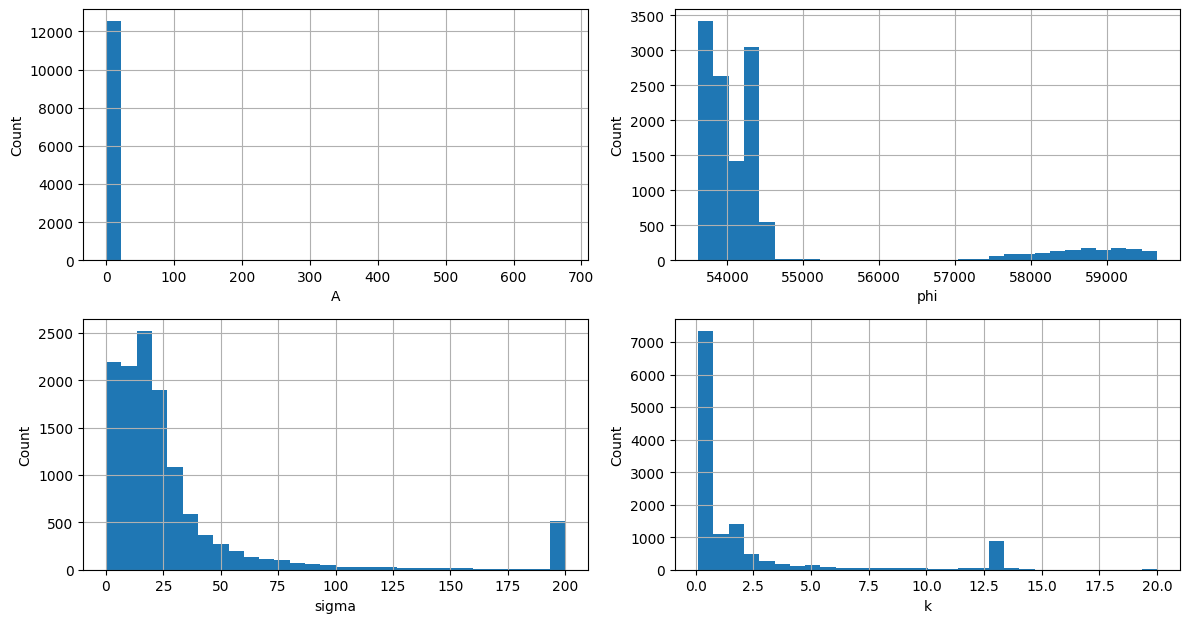

In [ ]:
histogram(Ia)

In [ ]:
Ia['band'].value_counts()

,count
band,
r',2290
i',2286
g',2207
z',2202
u',2162
G,1443


Type Ib/c supernovae

In [ ]:
Ibc = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML_Fall2025_Supernovae/ML_master_table_TypeIbc.csv')
#Ibc.head(5)
Ibc.describe()

,A,phi,sigma,k
count,6.000000e+02,600.000000,600.000000,600.000000
mean,1.855215e+00,54878.364957,32.874721,1.513675
std,1.298210e+01,1799.490705,37.696727,3.369205
min,9.307315e-21,53319.985772,0.569556,0.100000
25%,7.920327e-01,53751.343481,13.549174,0.100000
50%,1.136069e+00,54060.817736,23.480199,0.125074
75%,1.277883e+00,54441.562713,37.039806,1.089995
max,2.989406e+02,59634.330230,200.000000,19.999999


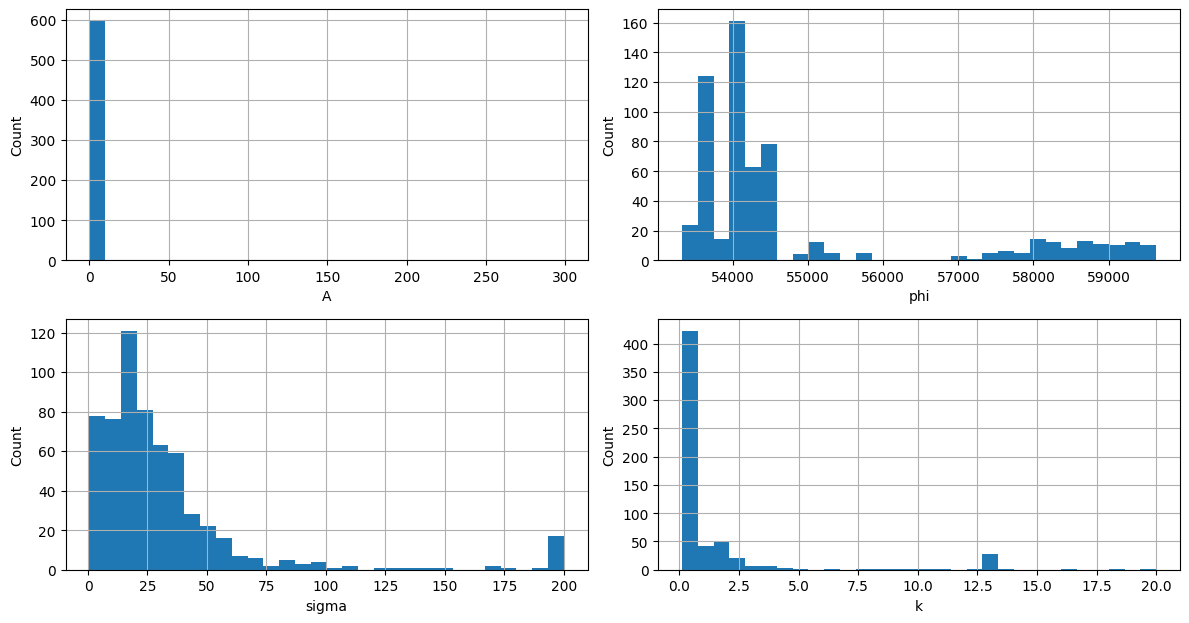

In [ ]:
histogram(Ibc)

In [ ]:
Ibc['band'].value_counts()

,count
band,
i',148
G,144
r',144
u',70
g',67
z',66


Type II supernovae

In [ ]:
II = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML_Fall2025_Supernovae/ML_master_table_TypeII.csv')
#II.head(5)
II.describe()

,A,phi,sigma,k
count,1.244700e+04,12447.000000,12447.000000,12447.000000
mean,2.294707e+00,54307.678700,78.052403,1.056724
std,1.092457e+02,1084.127104,68.621351,2.403245
min,6.840233e-23,53611.222740,0.133485,0.100000
25%,6.924014e-01,53698.302752,19.651938,0.100000
50%,9.287552e-01,54056.052571,52.654359,0.219722
75%,1.100714e+00,54365.460400,123.300867,0.857644
max,1.207418e+04,59650.109260,200.000000,20.000000


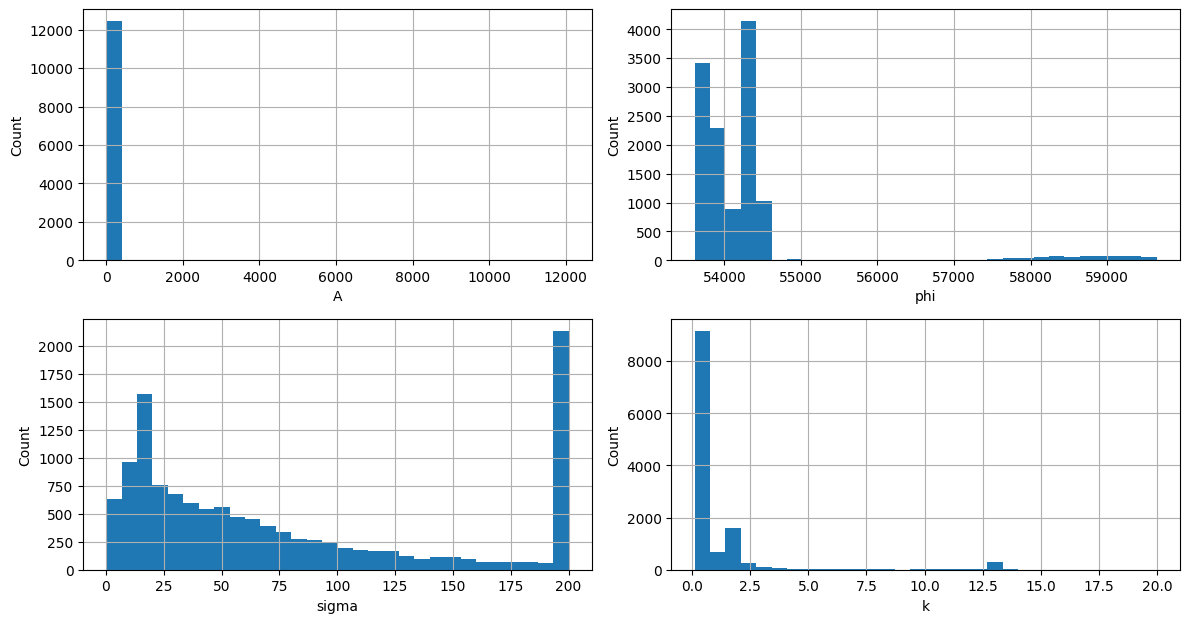

In [ ]:
histogram(II)

In [ ]:
II['band'].value_counts()

,count
band,
i',2409
r',2407
g',2341
z',2334
u',2309
G,784


Plot histograms of three datasets together

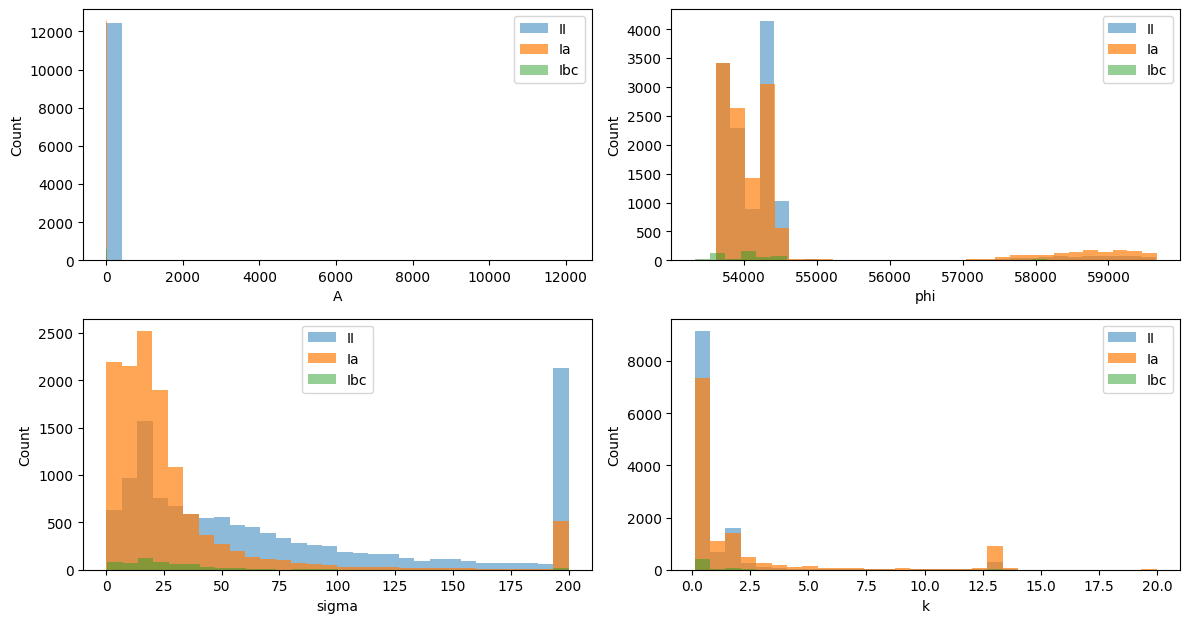

In [ ]:
def histogram_all(df1=Ia, df2=Ibc, df3=II):
    skip = {'sn_name', 'sn_type', 'band'}
    cols = [c for c in df1.columns if c not in skip]

    n = len(cols)
    rows = (n + 2) // 2    # number of rows needed
    fig, axes = plt.subplots(rows, 2, figsize=(12, 3*rows))

    axes = axes.flatten()  # flatten so we can index axis[i]

    for i, column in enumerate(cols):
        ax = axes[i]

        # Plot histograms from all three datasets
        ax.hist(df3[column].dropna(), bins=30, alpha=0.5, label="II")
        ax.hist(df1[column].dropna(), bins=30, alpha=0.7, label="Ia")
        ax.hist(df2[column].dropna(), bins=30, alpha=0.5, label="Ibc")


        #ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel("Count")
        ax.legend()

    # Hide unused axes if columns not multiple of 3
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

histogram_all()

Merge three datasets

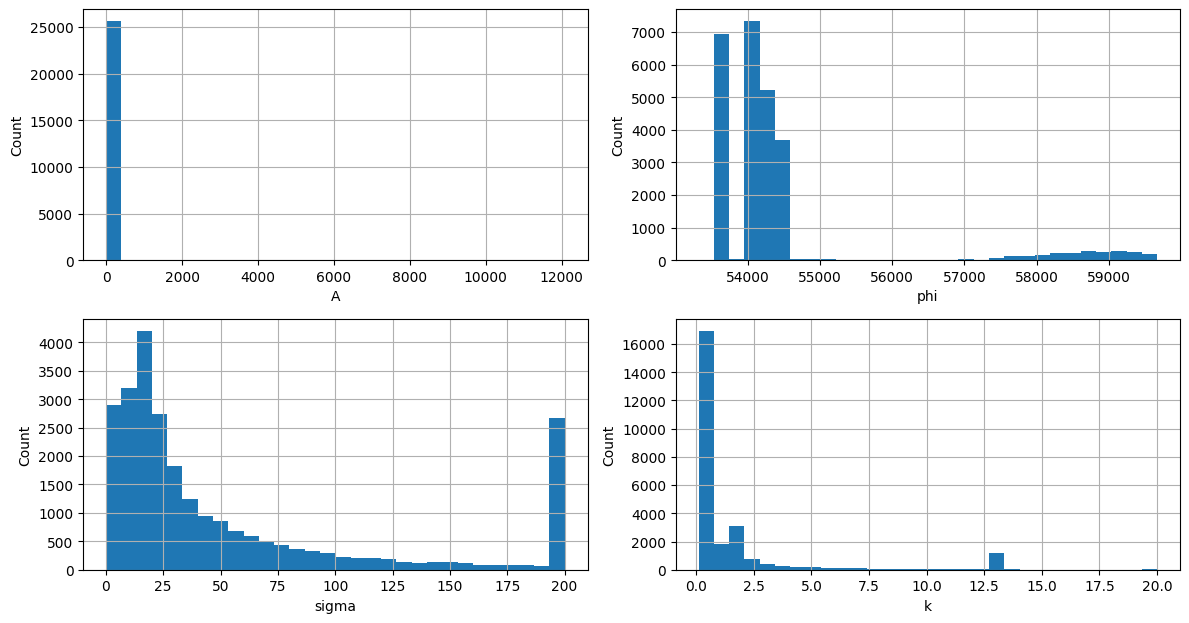

In [ ]:
# Combine them
df_all = pd.concat([Ia, Ibc, II], ignore_index=True)

# Plot histogram
histogram(df_all)

Clipping data

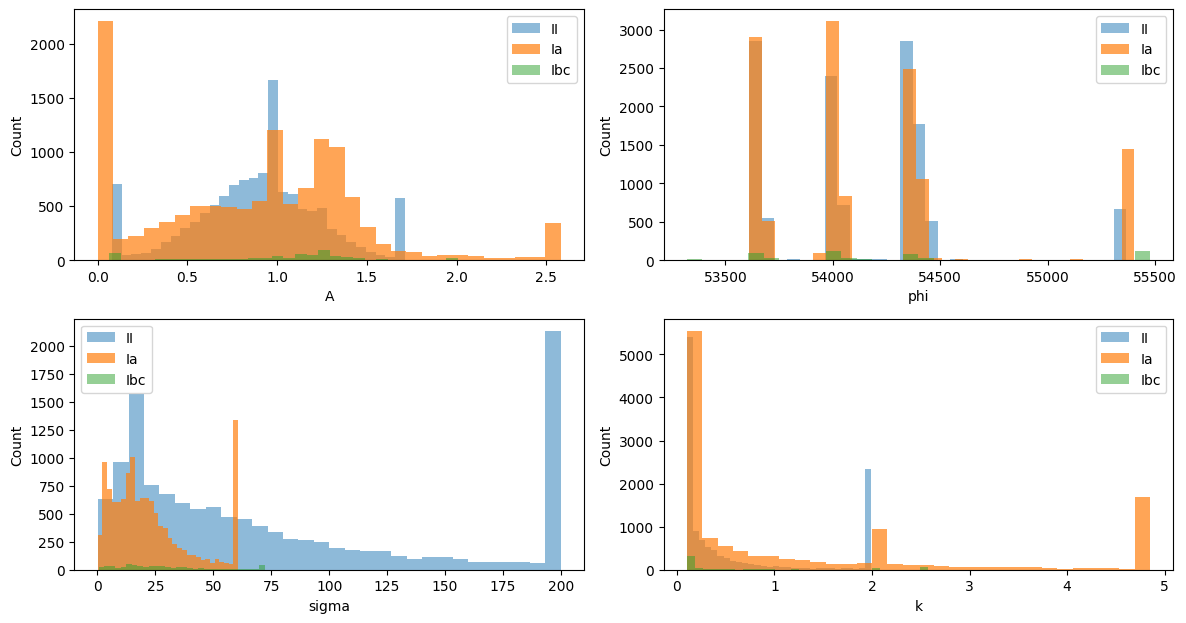

In [ ]:
skip = {'sn_name', 'sn_type', 'band'}
feature_cols = [c for c in Ia.columns if c not in skip]

Ia = Ia[feature_cols]
Q1_a = Ia.quantile(0.25)
Q3_a = Ia.quantile(0.75)
IQR_a = Q3_a - Q1_a

lower_a = Q1_a - 1.5 * IQR_a
upper_a = Q3_a + 1.5 * IQR_a

Ia_clip = Ia.clip(lower=lower_a, upper=upper_a, axis=1)


Ibc = Ibc[feature_cols]
Q1_bc = Ibc.quantile(0.25)
Q3_bc = Ibc.quantile(0.75)
IQR_bc = Q3_bc - Q1_bc

lower_bc = Q1_bc - 1.5 * IQR_bc
upper_bc = Q3_bc + 1.5 * IQR_bc

Ibc_clip = Ibc.clip(lower=lower_bc, upper=upper_bc, axis=1)

II = II[feature_cols]
Q1 = II.quantile(0.25)
Q3 = II.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

II_clip = II.clip(lower=lower, upper=upper, axis=1)

histogram_all(Ia_clip, Ibc_clip, II_clip)